In [1]:
#from __future__ import annotations
#from tkinter import N

from TREEplus import *

import pandas as pd

#d = dict(features, **n_features)  #merges the two dicts
#df = pd.DataFrame(data=d)         #creates the dataframe

#print(df)
#import csv



In [2]:
import numpy as np
train = np.genfromtxt("Carseats_train.csv", delimiter=',', names=True, dtype=(float,float,float,float, float, float, object, float, float, object, object))



#c = numpy.loadtxt("Carseats_train.csv")
print(type(train))
print(train.dtype)

features_names = train.dtype.names

n_features = train[["ShelveLoc", "US","Urban"]]
n_features_names = n_features.dtype.names
n_features_names

y = train["Price"]

features = train[["Sales", "CompPrice", "Income", "Advertising", "Population", "Age", "Education"]]
features_names = features.dtype.names


indici = np.arange(0, len(y))


<class 'numpy.ndarray'>
[('Sales', '<f8'), ('CompPrice', '<f8'), ('Income', '<f8'), ('Advertising', '<f8'), ('Population', '<f8'), ('Price', '<f8'), ('ShelveLoc', 'O'), ('Age', '<f8'), ('Education', '<f8'), ('Urban', 'O'), ('US', 'O')]


.to_records()

train = pd.read_csv("Carseats_train.csv")
train = train.to_records()

In [3]:
import numpy as np
test = np.genfromtxt("Carseats_test.csv", delimiter=',', names=True, dtype=(float,float,float,float, float, float, object, float, float, object, object))


n_features_test = test[["ShelveLoc", "US","Urban"]]


y_test = test["Price"]

features_test = test[["Sales", "CompPrice", "Income", "Advertising", "Population", "Age", "Education"]]


In [4]:
#when definining a funcion please be aware we are using purity gain or information gain or greatest difference between variance, all positive aspects 
#adding user_defined as a possible impurity_fn and added user_impur to carry that function 
def user_fn(self, node): #impur just takes node in tree
    
    return (mean(self.y[node.indexes])**2)*len(self.y[node.indexes])


In [5]:
comp = list(features["CompPrice"][0:20])
comp.sort()


In [6]:
node1 = MyNodeClass('n1', indici) 
tree = TREEplus(y,features,features_names,n_features,n_features_names, impurity_fn = "pearson", problem="regression", method = "TWO-STAGE",  min_cases_parent= 10,min_cases_child= 5, max_level = 10, twoing = False, min_imp_gain = 0.01, surrogate_split = True )

In [7]:
comp = tree.midway_points("CompPrice", node1)

In [8]:
tree.growing_tree(node1, max_k = 5)

Split Found:  n1 [['CompPrice', 127.5, 0.20228188075035491, 0]] start <TREEplus.MyNodeClass object at 0x000002390BB0FD10> CompPrice>127.5
node_proportion_total  0.20228188075035564
Split Found:  n2 [['Sales', 7.55, 0.20969032447490832, 1]] left <TREEplus.MyNodeClass object at 0x000002397AF9A8D0> Sales>7.55
node_proportion_total  0.3046767681766827
Node_proportion_gain  0.10239488742632707
Split Found:  n4 [['Age', 53.5, 0.19075555365175634, 2]] left <TREEplus.MyNodeClass object at 0x000002390FBB6C50> Age>53.5
node_proportion_total  0.3348077638461362
Node_proportion_gain  0.030130995669453486
Split Found:  n8 [['Income', 67.0, 0.3472236802682799, 3]] left <TREEplus.MyNodeClass object at 0x000002390FBDD010> Income>67.0
node_proportion_total  0.34974725911965104
Node_proportion_gain  0.014939495273514847
Split Found:  n16 [['Age', 40.5, 0.34689490137987866, 4]] left <TREEplus.MyNodeClass object at 0x000002390FC38410> Age>40.5
node_proportion_total  0.35524068739400466
Node_proportion_gai

((((None, None), (None, None)), (None, ((None, None), None))),
 ((None, None), ((None, None), None)))

surogate

In [9]:
for i in tree.get_all_node():
    print(i.name)
    for j in i.surrogate_splits:
        print(j)

n16
[(<TREEplus.MyNodeClass object at 0x000002390FCB84D0>, <TREEplus.MyNodeClass object at 0x000002390FD78A10>), 'CompPrice', 119.0, 0.08658332812792802]
[(<TREEplus.MyNodeClass object at 0x000002390FD49050>, <TREEplus.MyNodeClass object at 0x000002390FD790D0>), 'Income', 36.5, 0.038318475619369075]
[(<TREEplus.MyNodeClass object at 0x000002390FD49210>, <TREEplus.MyNodeClass object at 0x000002390FD79750>), 'Income', 43.0, 0.016731659869894888]
[(<TREEplus.MyNodeClass object at 0x000002390FC59950>, <TREEplus.MyNodeClass object at 0x000002390FD79810>), 'Income', 45.5, 0.021000687113498784]
n17
n18
n19
n10
n23
n44
n45
n12
n13
[(<TREEplus.MyNodeClass object at 0x000002390FF1BD50>, <TREEplus.MyNodeClass object at 0x000002390FF1BE50>), 'Income', 57.5, 0.029839897287453843]
[(<TREEplus.MyNodeClass object at 0x000002390FF1BE90>, <TREEplus.MyNodeClass object at 0x000002390FF1BC10>), 'Income', 59.0, 0.1285640941947681]
[(<TREEplus.MyNodeClass object at 0x000002390FF1BF90>, <TREEplus.MyNodeClass 

In [10]:
from collections import Counter


counterA =Counter({'apple': 3, 'orange': 2, 'banana': 1})
counterB =Counter({'apple': 2, 'orange': 1, 'grapefruit': 1})
print(counterA - counterB)
counterB - counterA


Counter({'apple': 1, 'orange': 1, 'banana': 1})


Counter({'grapefruit': 1})

In [11]:
ind1 =  [1,2,3,4,5,6,7,8,9,10]
ind2 = [1,2,5,6,7,8,9]

ind1 = Counter(ind1)
ind2 = Counter(ind2)

left = set(ind1).union(ind2) 
leftmatch = sum(ind1.get(k, 0) * ind2.get(k, 0) for k in left) / len([1,2,3,4,5,6,7,8,9,10])
leftmatch

0.7

In [12]:
len(set(ind1).intersection(ind2))

7

In [13]:
import math

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    print(terms)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)  #gives matches
    print(dotprod)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

In [14]:
counter_cosine_similarity(counterB, counterA) #is reversible 

{'grapefruit', 'apple', 'banana', 'orange'}
8


0.8728715609439696

In [15]:
#tree.time

In [16]:
#print(tree.impurity_fn, tree.impur(node1))
#
#for i in tree.get_all_node():
#    a =1
#    #print(i.name, tree.impur(i))

In [17]:
n_dict = tree.identify_subtrees(tree.get_all_node(), tree.get_leaf() )

#for i in n_dict:
#    print(i.name)
#    for a, nestedlist in enumerate(n_dict[i]):
#        for child in nestedlist:
#            print(a, child.name)
#



In [18]:
#tree.alpha_calculator(n_dict)

In [19]:
#dir(tree)

In [20]:
#tree._tree__node_search_split(node1, max_k = 1, combination_split = False, max_c = 1)

In [21]:
#all_nodes, leaves = tree.cut_tree(20)
#
#print(len(all_nodes), len(leaves))

In [22]:
#len(tree.get_leaf())

In [23]:
#tree.print_tree(all_node = all_nodes, leaf = leaves, filename = "a.png",table = False, html = False)

In [24]:
from statistics import variance, mean, pvariance

In [25]:
val = []
meann = mean(tree.y)
for i in tree.y:
    val.append((i - meann)**2)

sum(val) / len(val) * len(val)



155526.82499999992

In [26]:
pvariance(tree.y)*len(y)

155526.82499999998

In [27]:
variance(tree.y)*len(y)

156084.2688172043

In [28]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

start = time.time()
tree.print_tree(table = True, html = False).style.hide()#_index() #print both the pruned and non pruned tree 
#tree.print_tree(table = False, html = False, visual_pruning = True)
#time.time() - start

Node,Node Type,Variable Split,n,Deviance,Explained Deviance,Class/Value
n1,Parent,CompPrice>127.5,280,155526.82,0.202,115.78
n2,Parent,Sales>7.55,162,75946.05,0.305,106.73
n4,Parent,Age>53.5,89,24566.4,0.335,115.71
n8,Parent,Income>67.0,27,6691.63,0.35,126.7
n16,Child,None,13,2462.92,None,117.08
n17,Child,None,14,1905.21,None,135.64
n9,Parent,Sales>2.76,62,13188.6,0.372,110.92
n18,Child,None,6,999.33,None,128.67
n19,Child,None,56,10096.98,None,109.02
n5,Parent,CompPrice>99.0,73,35454.49,0.435,95.78


In [29]:
tree.print_tree(table = False, html = False, visual_pruning = True)

In [30]:
all_node, leaves = tree.cut_tree(11)
tree.print_tree(all_node, leaves, html = False, visual_pruning = True)

To return the table, print_tree must be True: setting print_tree to True
Best tree for test set has 6 leaves with a deviance of: 365.12339845930427 


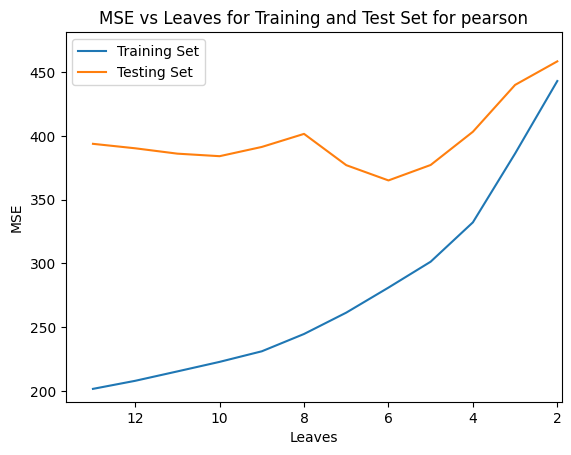

In [31]:
start = time.time()
alpha, pruned_table = tree.pruning(features_test, n_features_test, y_test, table = True, html = False, graph_results = True)
#pruned_table#.style#.hide_index()

#time.time()- start

In [32]:
alpha

[('Alpha = 0',
  'value soglia = None',
  'deviance = 201.65051750828545',
  'leaves = 13'),
 ('Alpha = 1768.8999999999996',
  "value soglia = ['Age', 29.5, 4]",
  'deviance = 207.96801750828556',
  'leaves = 12'),
 ('Alpha = 2067.2222222222235',
  "value soglia = ['Sales', 11.879999999999999, 3]",
  'deviance = 215.3509540162221',
  'leaves = 11'),
 ('Alpha = 2092.2812980030776',
  "value soglia = ['Sales', 2.755, 3]",
  'deviance = 222.82338722337602',
  'leaves = 10'),
 ('Alpha = 2323.492266992266',
  "value soglia = ['Income', 67.0, 3]",
  'deviance = 231.12157389120551',
  'leaves = 9'),
 ('Alpha = 3800.534375000003',
  "value soglia = ['Sales', 10.629999999999999, 3]",
  'deviance = 244.69491094477667',
  'leaves = 8'),
 ('Alpha = 4686.178090558838',
  "value soglia = ['Age', 53.5, 2]",
  'deviance = 261.431261268201',
  'leaves = 7'),
 ('Alpha = 5499.0029556650225',
  "value soglia = ['CompPrice', 135.5, 2]",
  'deviance = 281.0705575384331',
  'leaves = 6'),
 ('Alpha = 5689.688

In [33]:
tree.print_alpha(alpha)

('Alpha = 0', 'value soglia = None', 'deviance = 201.65051750828545', 'leaves = 13')
('Alpha = 1768.8999999999996', "value soglia = ['Age', 29.5, 4]", 'deviance = 207.96801750828556', 'leaves = 12')
('Alpha = 2067.2222222222235', "value soglia = ['Sales', 11.879999999999999, 3]", 'deviance = 215.3509540162221', 'leaves = 11')
('Alpha = 2092.2812980030776', "value soglia = ['Sales', 2.755, 3]", 'deviance = 222.82338722337602', 'leaves = 10')
('Alpha = 2323.492266992266', "value soglia = ['Income', 67.0, 3]", 'deviance = 231.12157389120551', 'leaves = 9')
('Alpha = 3800.534375000003', "value soglia = ['Sales', 10.629999999999999, 3]", 'deviance = 244.69491094477667', 'leaves = 8')
('Alpha = 4686.178090558838', "value soglia = ['Age', 53.5, 2]", 'deviance = 261.431261268201', 'leaves = 7')
('Alpha = 5499.0029556650225', "value soglia = ['CompPrice', 135.5, 2]", 'deviance = 281.0705575384331', 'leaves = 6')
('Alpha = 5689.688888888888', "value soglia = ['CompPrice', 146.5, 2]", 'deviance =

To return the table, print_tree must be True: setting print_tree to True
Best tree for test set has 6 leaves with a deviance of: 365.12339845930427 


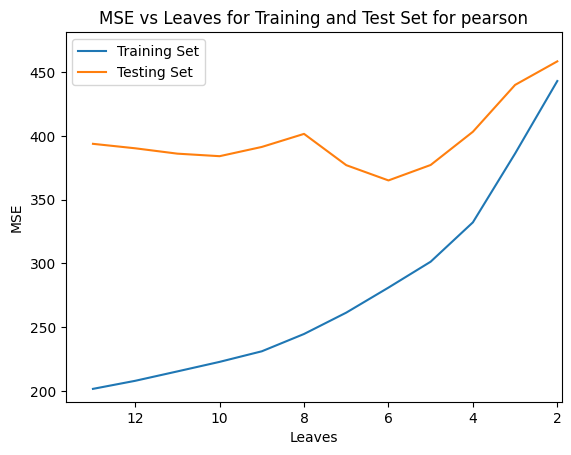

In [34]:
alpha, pruned_table = tree.pruning(features_test, n_features_test, y_test, table = True, html = False, graph_results = True, visual_pruning = True)

In [35]:
print(len(tree.get_leaf()), len(tree.get_all_node()))

13 25


In [36]:
tree.deviance_cat2

<bound method TREEplus.deviance_cat2 of <TREEplus.TREEplus object at 0x000002390C55EFD0>>

In [37]:
tree.cut_tree(5)

([<TREEplus.MyNodeClass at 0x2390fdf9050>,
  <TREEplus.MyNodeClass at 0x2390fce81d0>])

In [38]:
tree.print_alpha(alpha)


('Alpha = 0', 'value soglia = None', 'deviance = 201.65051750828545', 'leaves = 13')
('Alpha = 1768.8999999999996', "value soglia = ['Age', 29.5, 4]", 'deviance = 207.96801750828556', 'leaves = 12')
('Alpha = 2067.2222222222235', "value soglia = ['Sales', 11.879999999999999, 3]", 'deviance = 215.3509540162221', 'leaves = 11')
('Alpha = 2092.2812980030776', "value soglia = ['Sales', 2.755, 3]", 'deviance = 222.82338722337602', 'leaves = 10')
('Alpha = 2323.492266992266', "value soglia = ['Income', 67.0, 3]", 'deviance = 231.12157389120551', 'leaves = 9')
('Alpha = 3800.534375000003', "value soglia = ['Sales', 10.629999999999999, 3]", 'deviance = 244.69491094477667', 'leaves = 8')
('Alpha = 4686.178090558838', "value soglia = ['Age', 53.5, 2]", 'deviance = 261.431261268201', 'leaves = 7')
('Alpha = 5499.0029556650225', "value soglia = ['CompPrice', 135.5, 2]", 'deviance = 281.0705575384331', 'leaves = 6')
('Alpha = 5689.688888888888', "value soglia = ['CompPrice', 146.5, 2]", 'deviance =

In [39]:
#all_node = cart.get_all_node()
#leaf = tree.get_leaf()
#      
#leaf_list =[]
#leaf_dict ={}
#for node in leaf:                           #creates a list of the node numbers and a dictionary connecting nodes with their node numbers
#    leaf_list.append(int(node.name[1:]))
#    leaf_dict[node] = int(node.name[1:])
#father_list =[]
#father_dict = {}
#for node in all_node:
#    father_list.append(int(node.name[1:]))
#    father_dict[node] = int(node.name[1:])
#
#parent_child =[]                            #list for having child with their parent, for use in dictionary below
#for node in all_node:
#    if (int(node.name[1:]) *2) in father_list:
#    
#        parent_child.append([int(node.name[1:]), int(node.name[1:])*2])
#    if (int(node.name[1:])*2+1) in father_list:
#    
#        parent_child.append([int(node.name[1:]), int(node.name[1:])*2+1])  
#parent_children = {}                        #dictionary for parents with children, only numbers
#for parent, child in parent_child: 
#    if parent in parent_children:
#        parent_children[parent].append(child)
#    else:
#        parent_children[parent] = [child]
#
##igraph Graph
#        
#nr_vertices = max(father_list)                            # make too many to allow for missing nodes
#v_label = list(map(str, father_list) )                      # create node labels 
#G = Graph.Tree(nr_vertices, 2)                              # 2 stands for children number
#lay = G.layout_reingold_tilford(root=[0])
#position = {k: lay[k-1] for k in father_list}               # assigning nodes to positions , using reigngold layou
#

In [40]:
#node_prop_dict = {}
#for i in range(len(father_list)):
#    if get_key(father_dict, father_list[i]).node_prop:
#        node_prop_dict[father_list[i]] = get_key(father_dict, father_list[i]).node_prop

In [41]:
#node_prop_gain = {}
#node_prop_gain[1] = node_prop_dict[1]
#for i in range(len(node_prop_dict)):
#    if i!= 0:
#        node_prop_gain[list(node_prop_dict.keys())[i]] = node_prop_dict[list(node_prop_dict.keys())[i]] - node_prop_dict[list(node_prop_dict.keys())[i-1]]

In [42]:
#nr_vertices = max(father_list)                            # make too many to allow for missing nodes
#v_label = list(map(str, father_list) )                      # create node labels 
#G = Graph.Tree(nr_vertices, 2)                              # 2 stands for children number
#lay = G.layout_reingold_tilford(root=[0])
#position = {k: lay[k-1] for k in father_list}               # assigning nodes to positions , using reigngold layou
#
#new_dict = cart.identify_subtrees(cart.get_all_node(), cart.get_leaf())
#    
#for i in sorted(position.keys()):
#    if i*2 in position: #left nodes
#        diff = position[i*2][1] - position[i*2][1]*node_prop_gain[i] #calculates change in position for correction in downward nodes
#        position[i*2] = [position[i*2][0], position[i*2][1]*node_prop_gain[i]] #manipulates the y coordinate based on the proportion gain
#        
#        #this is to correct for all downward nodes 
#        unique_nodes = []
#        for fathers in new_dict:
#            if i*2 == int(fathers.name[1:]):
#                for nestedlist in new_dict[fathers]:
#                    for childs in nestedlist:
#                        if childs.name not in unique_nodes:
#                            unique_nodes.append(childs.name)
#                            position[int(childs.name[1:])] = [position[int(childs.name[1:])][0], position[int(childs.name[1:])][1] - diff]
#
#
#    if i*2+1 in position:  #right nodes
#        position[i*2+1] = [position[i*2+1][0], position[i*2+1][1]*node_prop_gain[i]]
#        
#        #this is to correct for all downward nodes
#        unique_nodes = []
#        for fathers in new_dict:
#            if i*2+1 == int(fathers.name[1:]):
#                for nestedlist in new_dict[fathers]:
#                    for childs in nestedlist:
#                        if childs.name not in unique_nodes:
#                            unique_nodes.append(childs.name)
#                            position[int(childs.name[1:])] = [position[int(childs.name[1:])][0], position[int(childs.name[1:])][1] - diff]
#
#position[1] = [0 , 2*position[2][1]]
#

In [43]:
#Y = [lay[k][1] for k in range(len(father_list))] # levels of the tree
#M = max(Y)
#es = EdgeSeq(G)                                             # sequence of edges
#E = [e.tuple for e in G.es] # list of edges, connects nodes
##L = len(position)
#Xn = [position[k][0] for k in father_list]
#Yn = [position[k][1] for k in father_list]
#a = 0
#while a<20:                                                 # When the value is removed it skips to the next index value, jumping, a<10 is just overkill, increased to 20, for really narrow branches
#    for edge in E:   #this is meant to catch the mismateched E's 
#        if edge[0] +1 not in position or edge[1]+1 not in position:
#            E.remove(edge) 
#    a+=1
#Xe = []
#Ye = []
#
#for edge in E: 
#    Xe+=[position[edge[0]+1][0],position[edge[1]+1][0], None]                   # edited for +1 poisiotn as the expected 0 root node it 1 in our dictionary, if index error, increase a 
#    Ye+=[position[edge[0]+1][1],position[edge[1]+1][1], None]         
#

In [44]:
#upward facing tree
#pos = Ye[1]*2
#Ye[0] = pos
#Ye[3] = pos
#Yn[24]  =pos

In [45]:
#for label in range(len(v_label)):
#    for node in all_node:
#        if v_label[label] == node.name[1:]:
#            if int(v_label[label]) in leaf_list:
#                if cart.problem == "classifier":        #For classifier problem
#                    response_dict ={}
#                    for response in cart.y[node.indexes]:        #determing majority in terminal nodes
#                        
#                        if response in response_dict:
#                            response_dict[response] +=1
#                        else:
#                            response_dict[response] =1
#                    
#                    if cart.method == "LATENT-BUDGET-TREE" or cart.twoing: #multiclass methods
#                        total_node_obs = sum(response_dict.values())
#                        for key in response_dict:
#                            response_dict[key] = round(response_dict[key] / total_node_obs,2)
#                        class_node = response_dict
#                        myKeys = list(class_node.keys())
#                        myKeys.sort()
#                        class_node = {i: class_node[i] for i in myKeys}
#                    else:
#                        class_node = max(response_dict, key = response_dict.get)
#                    
#                    if cart.impurity_fn == "gini":
#                        v_label[label] = f"{node.name}, Class: {class_node}, {cart.impurity_fn} : {round(cart.impur(node, display = True),2)}, Samples : {len(node.indexes)}" 
#                    elif cart.impurity_fn == "tau":
#                        v_label[label] = f"{node.name}, Class: {class_node}, {cart.impurity_fn} : None, Samples : {len(node.indexes)}" 
#                    else:
#                        v_label[label] = f"{node.name}, Class: {class_node}, {cart.impurity_fn} : {round(cart.impur(node),2)}, Samples : {len(node.indexes)}"
#                else:
#                    mean_y = mean(cart.y[node.indexes])
#                    v_label[label]=  f"{node.name}, {node.split}, Bin Value: {round(mean_y,2)}, {cart.impurity_fn} : {round(cart.impur(node),2)}, Samples : {len(node.indexes)}"
#            
#            #label for non leaves
#            else:
#                if cart.problem == "classifier":
#                    response_dict ={}
#                    for response in cart.y[node.indexes]:        #determing majority in terminal nodes
#                        if response in response_dict:
#                            response_dict[response] +=1
#                        else:
#                            response_dict[response] =1
#                    
#                    if cart.method == "LATENT-BUDGET-TREE" or cart.twoing: #multiclass methods
#                        total_node_obs = sum(response_dict.values())
#                        for key in response_dict:
#                            response_dict[key] = round(response_dict[key] / total_node_obs,2)
#                        class_node = response_dict
#                        myKeys = list(class_node.keys())
#                        myKeys.sort()
#                        class_node = {i: class_node[i] for i in myKeys}
#                    else:
#                        class_node = max(response_dict, key = response_dict.get)
#                    if cart.impurity_fn == "gini":
#                        v_label[label] = f"{node.name}, {node.split}, Class:{class_node}, {cart.impurity_fn} : {round(cart.impur(node, display = True),2)}, Samples: {len(node.indexes)}"
#                    elif cart.impurity_fn == "tau":
#                        v_label[label] = f"{node.name}, {node.split}, Class:{class_node}, {cart.impurity_fn} : {round(node.value_soglia_split[0][2],2)}, Samples: {len(node.indexes)}" 
#                    else:
#                        v_label[label] = f"{node.name}, {node.split}, Class:{class_node}, {cart.impurity_fn} : {round(cart.impur(node),2)}, Samples: {len(node.indexes)}"
#                else:
#                    mean_y = mean(cart.y[node.indexes])
#                    v_label[label]=  f"{node.name}, {node.split}, Bin Value: {round(mean_y,2)}, {cart.impurity_fn} : {round(cart.impur(node),2)}, Samples : {len(node.indexes)}"
#labels = v_label
## Drawing using plotly library
#fig = go.Figure()
#fig.add_trace(go.Scatter(x=Xe,
#                y=Ye,
#                mode='lines',
#                line=dict(color='rgb(210,210,210)', width=1),
#                hoverinfo='none'
#                ))
#fig.add_trace(go.Scatter(x=Xn,
#                y=Yn,
#                mode='markers',
#                name='Nodes',
#                marker=dict(symbol='circle-dot',
#                                size=18,
#                                color='#6175c1',    #'#DB4551',
#                                line=dict(color='rgb(50,50,50)', width=1)
#                                ),
#                text=labels,
#                hoverinfo='text',
#                opacity=0.8
#                ))
#filename="CART_tree.png"
#fig.update_layout(
#    title=filename[:-4],    #chops off ".png"
#    )
#fig.show()
#

full dataset model 

not set up for numpy yet teh full model 

In [46]:
#df=pd.read_csv('Carseats.csv')
#df=df.iloc[:,1:]
#
#df.head()
#
#features = df[features_names]
#features.head()
#
#n_features = df[n_features_names]
#n_features.head()
#
#y = df["Price"]
#y.head()
#
#indici = np.arange(0, len(y))
#

In [47]:
#my_tree = MyNodeClass('n1', indici) 

#tree = TREEplus(y,features,features_names,n_features,n_features_names, impurity_fn = "between_variance", problem="regression", method = "tree",  min_cases_parent= 10,min_cases_child= 5, max_level = 4)

#tree.growing_tree(my_tree)


need to somehow get only 29 leaves in final tree?
can't prune the traditional way as only have training set 

In [48]:
#cart.print_tree(table = True, html = True).style.hide_index() #print both the pruned and non pruned tree 

